Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Bioinformatika 1

### 1. Čitanje podataka

In [8]:
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.cluster import KMeans

In [495]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J29B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/J29_B_CE_IonXpress_005.fastq")


expected = list(SeqIO.parse(path, "fasta"))

from Bio import Align

local_aligner = Align.PairwiseAligner()
local_aligner.mode = 'local'
local_aligner.match_score = 1
local_aligner.open_gap_score = -1
local_aligner.extend_gap_score = -1
local_aligner.target_end_gap_score = 0
local_aligner.query_end_gap_score = -0.5


global_aligner = Align.PairwiseAligner()
global_aligner.mode = 'global'
global_aligner.match_score = 1
global_aligner.open_gap_score = -1
global_aligner.extend_gap_score = -1
global_aligner.target_end_gap_score = 0
global_aligner.query_end_gap_score = -0.5


data = list(SeqIO.parse(pathFASTQ, "fastq"))

i=0
for sequence in data:   
    
    
    alignments_local = local_aligner.align(expected[0].seq,sequence.seq)     
    alignments_global = global_aligner.align(expected[0].seq,sequence.seq)
    
    if(alignments_local[0].score < alignments_global[0].score):
        break   

    print("Iter: ",i,"Sequence len:",len(sequence.seq),"  Local len:",len(alignments_local),"  Score local = %.1f:" % alignments_local[0].score,"Global len:",len(alignments_global),"  Score global= %.1f:" % alignments_global[0].score)
    i+=1
    
#OVDJE GLEDAMO RAZLIKU U SCOREU ZA LOKALNO I GLOBALNO PORAVNANJE
#VIDIMO DA JE LOKALNO UVIJEK VEĆI SCORE PA SAM KORISTILA DALJE SAMO LOKALNO

Iter:  0 Sequence len: 35   Local len: 9   Score local = 19.0: Global len: 117   Score global= -86.0:
Iter:  1 Sequence len: 50   Local len: 144   Score local = 25.0: Global len: 3078   Score global= -71.5:
Iter:  2 Sequence len: 33   Local len: 43   Score local = 17.0: Global len: 20   Score global= -89.0:
Iter:  3 Sequence len: 253   Local len: 6   Score local = 199.0: Global len: 6   Score global= 184.0:
Iter:  4 Sequence len: 296   Local len: 2   Score local = 230.0: Global len: 2   Score global= 230.0:
Iter:  5 Sequence len: 37   Local len: 72   Score local = 19.0: Global len: 62   Score global= -84.5:
Iter:  6 Sequence len: 66   Local len: 6300   Score local = 31.0: Global len: 77760   Score global= -57.0:
Iter:  7 Sequence len: 156   Local len: 1   Score local = 122.0: Global len: 1   Score global= 62.0:
Iter:  8 Sequence len: 58   Local len: 297   Score local = 28.0: Global len: 233280   Score global= -63.0:
Iter:  9 Sequence len: 54   Local len: 462   Score local = 27.0: Globa

In [581]:
filtered_data=[]
for sequence in data:  
    if (len(sequence.seq)>254):
        continue
    filtered_data.append(sequence.seq)
   
print(len(filtered_data))


#OVDJE ODBACUJEM SEKVENCE KOJE SU DULJE OD 254, JER SU VALJDA TO KRIVA OČITANJA

3377


In [582]:
scores=[]
for sequence in filtered_data:  
    alignments0 = local_aligner.align(expected[0].seq,sequence)  
    alignments1 = local_aligner.align(expected[1].seq,sequence)  
    alignments2 = local_aligner.align(expected[2].seq,sequence)  
    scores.append([alignments0[0].score,alignments1[0].score,alignments2[0].score])
    

#USPOREĐUJEM SVAKU SEKVENCU SA SVAKOM SEKVENCOM OD EXPECTED

In [583]:
print(scores)


[[19.0, 18.0, 19.0], [25.0, 24.0, 24.0], [17.0, 17.0, 17.0], [199.0, 209.0, 187.0], [19.0, 18.0, 20.0], [31.0, 30.0, 31.0], [122.0, 125.0, 110.0], [28.0, 27.0, 29.0], [27.0, 27.0, 27.0], [18.0, 17.0, 16.0], [26.0, 25.0, 24.0], [16.0, 15.0, 15.0], [27.0, 26.0, 27.0], [27.0, 26.0, 25.0], [26.0, 25.0, 24.0], [173.0, 182.0, 162.0], [127.0, 130.0, 145.0], [15.0, 15.0, 15.0], [19.0, 18.0, 19.0], [14.0, 13.0, 14.0], [25.0, 24.0, 24.0], [26.0, 25.0, 24.0], [25.0, 24.0, 24.0], [24.0, 23.0, 25.0], [26.0, 25.0, 24.0], [27.0, 26.0, 27.0], [26.0, 25.0, 24.0], [25.0, 24.0, 24.0], [25.0, 24.0, 24.0], [26.0, 25.0, 25.0], [28.0, 28.0, 28.0], [25.0, 24.0, 24.0], [25.0, 24.0, 24.0], [25.0, 24.0, 24.0], [22.0, 21.0, 23.0], [25.0, 24.0, 23.0], [27.0, 26.0, 27.0], [28.0, 27.0, 26.0], [25.0, 24.0, 24.0], [26.0, 25.0, 24.0], [25.0, 24.0, 24.0], [33.0, 32.0, 31.0], [33.0, 32.0, 32.0], [24.0, 23.0, 23.0], [31.0, 30.0, 29.0], [31.0, 30.0, 32.0], [18.0, 17.0, 16.0], [22.0, 21.0, 23.0], [18.0, 17.0, 16.0], [19.0, 

In [584]:
from sklearn.preprocessing import StandardScaler
scores_standard = StandardScaler().fit_transform(scores)
print(scores_standard)

#STANDARDIZACIJA SCOREA

[[-1.47331501 -1.47172731 -1.4699417 ]
 [-1.37685357 -1.37787892 -1.38390913]
 [-1.50546882 -1.48736871 -1.50435473]
 ...
 [-1.55369955 -1.5499343  -1.55597427]
 [ 0.56845221  0.56165451  0.49160084]
 [ 0.53629839  0.42088192  0.37115525]]


In [585]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scores_standard)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
print(principalDf)
print(principalDf.PC1.values)
print(principalDf.PC2.values)

#PREBACUJEM U DVIJE DIM

           PC1       PC2
0    -2.548992 -0.001834
1    -2.389435 -0.009120
2    -2.596440 -0.009863
3     2.515619 -0.031134
4    -2.539080  0.012211
...        ...       ...
3372  0.428473 -0.081686
3373  0.974295 -0.042139
3374 -2.690217 -0.007467
3375  0.936386 -0.058676
3376  0.767039 -0.090720

[3377 rows x 2 columns]
[-2.54899214 -2.38943452 -2.59643952 ... -2.69021681  0.93638602
  0.76703884]
[-0.00183417 -0.00911983 -0.0098634  ... -0.00746684 -0.05867602
 -0.09072029]


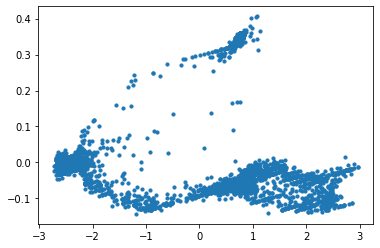

In [586]:
plt.scatter(principalDf.PC1.values, principalDf.PC2.values,  cmap=plt.get_cmap("cool"), s=10)

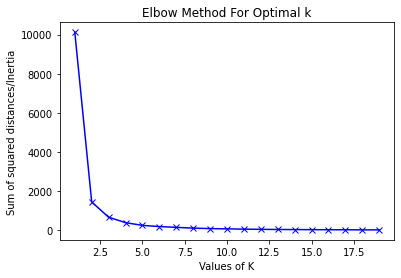

In [450]:
K = range(1,20)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

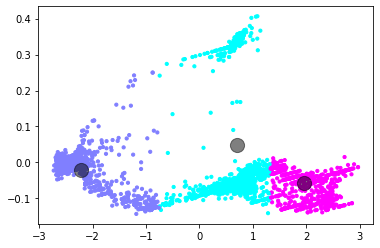

In [587]:
K=3
kmeans = KMeans(K).fit(principalDf)
predictions = kmeans.predict(principalDf)
plt.scatter(principalDf.PC1.values, principalDf.PC2.values, c=predictions, s=10, cmap='cool')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# K MEANS SA K=3

In [588]:
print(centers)


[[ 0.70968811  0.04890327]
 [-2.22165172 -0.02185449]
 [ 1.9516899  -0.05625023]]


In [589]:
cluster1=[]
cluster2=[]
cluster3=[]
for i in range (len(principalComponents)): 
    if(abs((principalComponents[i][0])-centers[0][0])<0.004):
        cluster1.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[1][0])<0.004):
        cluster2.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[2][0])<0.004):
        cluster3.append((i,scores[i]))
        
print(cluster1)
print()
print(cluster2)
print()
print(cluster3)
print()

#OVDJE GLEDAM KOJE SU MI TOČKE BLIZU OD CENTROIDA ZA 0.004, 0.004 JE NEKA PROIZVOLJNA VRIJEDNOST
    

[(478, [126.0, 130.0, 145.0]), (717, [128.0, 129.0, 144.0]), (1489, [128.0, 129.0, 144.0]), (1542, [128.0, 129.0, 144.0]), (1900, [128.0, 129.0, 144.0]), (2398, [141.0, 137.0, 125.0]), (3347, [138.0, 140.0, 125.0])]

[(344, [32.0, 30.0, 29.0]), (1560, [30.0, 30.0, 31.0]), (1627, [30.0, 29.0, 32.0]), (2933, [30.0, 32.0, 29.0]), (3091, [31.0, 30.0, 30.0])]

[(349, [187.0, 183.0, 165.0]), (783, [180.0, 188.0, 167.0]), (3263, [190.0, 181.0, 164.0])]



In [590]:
clusters=[cluster1,cluster2,cluster3]
for k in range(K):
    matrix=[]
    for i in clusters[k]:
        row=[]
        for j in clusters[k]:
            alignments = local_aligner.align(filtered_data[i[0]],filtered_data[j[0]])
            shorter=min(len(filtered_data[i[0]]),len(filtered_data[j[0]]))
            row.append(shorter-alignments[0].score)
        matrix.append(row)
    matrix=np.array(matrix)        
    print(matrix)
    print("Matrix mean=", np.mean(matrix))
    
#OVDJE SAM IŠLA VIDJETI KOLIKO SU MEĐUSOBNO UDALJENE TOČKE KOJE BI TREBALE BIT U ISTOJ GRUPI

[[ 0.  8.  9. 10.  9. 31. 36.]
 [ 8.  0.  3.  4.  3. 23. 25.]
 [ 9.  3.  0.  1.  0. 24. 25.]
 [10.  4.  1.  0.  1. 25. 26.]
 [ 9.  3.  0.  1.  0. 24. 25.]
 [31. 23. 24. 25. 24.  0. 21.]
 [36. 25. 25. 26. 25. 21.  0.]]
Matrix mean= 13.591836734693878
[[ 0.  4.  5.  4. 21.]
 [ 4.  0.  6.  5. 22.]
 [ 5.  6.  0.  6. 23.]
 [ 4.  5.  6.  0. 20.]
 [21. 22. 23. 20.  0.]]
Matrix mean= 9.28
[[ 0. 19.  6.]
 [19.  0. 16.]
 [ 6. 16.  0.]]
Matrix mean= 9.11111111111111


In [591]:
for k in range(K):
    for i in clusters[k]:
        print(filtered_data[i[0]])
        print()
    print("*******************************************************************************************************")

GATCCTCTCTCTGCAGCACATTTTCCTGGAGCATCATAAGTGCGAGTGTCATTTTCTCCAACGGGGACGGAGCGGGGTGCAGTTTCCCTGCAGAGATACATCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGGCGCCGTCCGCCAA

GATCCTCTCTCTGCAGCACATTTCCTGGAGCATCATAAGTGCGAGTGTCATTTCTCCAACGGGACGGAGCGGGTGCAGTTCCTGCAGAGATACATCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGCCGTCG

GATCCTCTCTCTGCAGCACATTTCCTGGAGCATCATAAGTGCGAGTGTCATTTCTCCAACGGGACGGAGCGGGTGCAGTTCCTGCAGAGATACATCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGCGCCGCC

GATCCTCTTTCTGCAGCACATTTCCTGGAGCATCATAAGTGCGAGTGTCATTTCTCCAACGGGACGGAGCGGGTGCAGTTCCTGCAGAGATACATCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGCGCCGCC

GATCCTCTCTCTGCAGCACATTTCCTGGAGCATCATAAGTGCGAGTGTCATTTCTCCAACGGGACGGAGCGGGTGCAGTTCCTGCAGAGATACATCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGCGCCGCC

GATCCTCTCTCTGCAGCACATTTTCCTGCTGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGGTGGGGGTTCCTGGACAGATACTTCTATAACGGAGA

In [ ]:
#SAD PONAVLJAM POSTUPAK NA FASTA J30


In [595]:



notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J30B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/J30_B_CE_IonXpress_006.fastq")

expected = list(SeqIO.parse(path, "fasta"))
data = list(SeqIO.parse(pathFASTQ, "fastq"))

from Bio import Align
local_aligner = Align.PairwiseAligner()
local_aligner.mode = 'local'
local_aligner.match_score = 1
local_aligner.open_gap_score = -1
local_aligner.extend_gap_score = -1
local_aligner.target_end_gap_score = 0
local_aligner.query_end_gap_score = -0.5

filtered_data=[]
for sequence in data:  
    if (len(sequence.seq)>254):
        continue
    filtered_data.append(sequence.seq)
   
print(len(filtered_data))

1350


In [596]:
scores=[]
for sequence in filtered_data:  
    alignments0 = local_aligner.align(expected[0].seq,sequence)  
    alignments1 = local_aligner.align(expected[1].seq,sequence)  
    alignments2 = local_aligner.align(expected[2].seq,sequence)  
    scores.append([alignments0[0].score,alignments1[0].score,alignments2[0].score])
    

print(scores)

[[136.0, 119.0, 127.0], [29.0, 29.0, 31.0], [29.0, 28.0, 26.0], [33.0, 37.0, 32.0], [27.0, 26.0, 26.0], [25.0, 26.0, 24.0], [31.0, 32.0, 30.0], [24.0, 24.0, 24.0], [25.0, 25.0, 25.0], [34.0, 36.0, 33.0], [32.0, 34.0, 31.0], [32.0, 35.0, 31.0], [24.0, 24.0, 25.0], [25.0, 25.0, 25.0], [31.0, 32.0, 30.0], [25.0, 25.0, 25.0], [25.0, 25.0, 25.0], [25.0, 25.0, 25.0], [31.0, 32.0, 30.0], [20.0, 19.0, 21.0], [25.0, 25.0, 25.0], [19.0, 20.0, 20.0], [22.0, 22.0, 23.0], [25.0, 25.0, 25.0], [19.0, 18.0, 20.0], [24.0, 24.0, 23.0], [26.0, 25.0, 24.0], [20.0, 19.0, 21.0], [20.0, 19.0, 21.0], [20.0, 19.0, 21.0], [26.0, 25.0, 24.0], [15.0, 15.0, 16.0], [17.0, 16.0, 16.0], [17.0, 16.0, 16.0], [19.0, 18.0, 18.0], [17.0, 16.0, 16.0], [17.0, 16.0, 16.0], [17.0, 19.0, 19.0], [17.0, 19.0, 18.0], [18.0, 18.0, 19.0], [20.0, 21.0, 21.0], [153.0, 136.0, 138.0], [26.0, 26.0, 24.0], [28.0, 28.0, 28.0], [20.0, 20.0, 20.0], [118.0, 103.0, 108.0], [32.0, 33.0, 31.0], [28.0, 28.0, 27.0], [19.0, 18.0, 20.0], [20.0, 19.

In [593]:
from sklearn.preprocessing import StandardScaler
scores_standard = StandardScaler().fit_transform(scores)
print(scores_standard)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scores_standard)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
print(principalDf)
print(principalDf.PC1.values)
print(principalDf.PC2.values)

[[-1.47331501 -1.47172731 -1.4699417 ]
 [-1.37685357 -1.37787892 -1.38390913]
 [-1.50546882 -1.48736871 -1.50435473]
 ...
 [-1.55369955 -1.5499343  -1.55597427]
 [ 0.56845221  0.56165451  0.49160084]
 [ 0.53629839  0.42088192  0.37115525]]
           PC1       PC2
0    -2.548992 -0.001834
1    -2.389435 -0.009120
2    -2.596440 -0.009863
3     2.515619 -0.031134
4    -2.539080  0.012211
...        ...       ...
3372  0.428473 -0.081686
3373  0.974295 -0.042139
3374 -2.690217 -0.007467
3375  0.936386 -0.058676
3376  0.767039 -0.090720

[3377 rows x 2 columns]
[-2.54899214 -2.38943452 -2.59643952 ... -2.69021681  0.93638602
  0.76703884]
[-0.00183417 -0.00911983 -0.0098634  ... -0.00746684 -0.05867602
 -0.09072029]


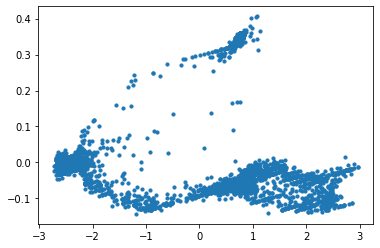

In [597]:
plt.scatter(principalDf.PC1.values, principalDf.PC2.values,  cmap=plt.get_cmap("cool"), s=10)

[[ 0.82183401 -0.04989882]
 [-1.38672976  0.00812958]
 [ 2.49406773  0.02023234]]


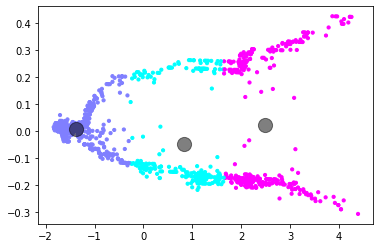

In [481]:
K=3
kmeans = KMeans(K).fit(principalDf)
predictions = kmeans.predict(principalDf)
plt.scatter(principalDf.PC1.values, principalDf.PC2.values, c=predictions, s=10, cmap='cool')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

print(centers)

#OVDJE KORISTIM VEĆ "NAUČENI" MODEL IZ PROŠLOG ZA PREDIKCIJU


In [483]:
cluster1=[]
cluster2=[]
cluster3=[]
for i in range (len(principalComponents)): 
    if(abs((principalComponents[i][0])-centers[0][0])<0.01):
        cluster1.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[1][0])<0.01):
        cluster2.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[2][0])<0.01):
        cluster3.append((i,scores[i]))
        
print(cluster1)
print()
print(cluster2)
print()
print(cluster3)
print()

[(860, [102.0, 89.0, 93.0])]

[(132, [28.0, 27.0, 26.0]), (151, [26.0, 27.0, 27.0]), (163, [28.0, 27.0, 26.0]), (174, [28.0, 27.0, 26.0]), (314, [28.0, 27.0, 26.0]), (624, [27.0, 27.0, 27.0]), (1059, [28.0, 27.0, 26.0])]

[(105, [157.0, 139.0, 142.0]), (728, [144.0, 137.0, 156.0]), (796, [156.0, 140.0, 141.0])]



In [484]:
clusters=[cluster1,cluster2,cluster3]
for k in range(K):
    matrix=[]
    for i in clusters[k]:
        row=[]
        for j in clusters[k]:
            alignments = local_aligner.align(filtered_data[i[0]],filtered_data[j[0]])
            shorter=min(len(filtered_data[i[0]]),len(filtered_data[j[0]]))
            row.append(shorter-alignments[0].score)
        matrix.append(row)
    matrix=np.array(matrix)        
    print(matrix)
    print("Matrix mean=", np.mean(matrix))

[[0.]]
Matrix mean= 0.0
[[ 0.  7.  6.  2.  1. 11.  2.]
 [ 7.  0.  2.  5.  6.  8.  7.]
 [ 6.  2.  0.  6.  5.  7.  7.]
 [ 2.  5.  6.  0.  1. 10.  2.]
 [ 1.  6.  5.  1.  0.  9.  2.]
 [11.  8.  7. 10.  9.  0.  9.]
 [ 2.  7.  7.  2.  2.  9.  0.]]
Matrix mean= 4.6938775510204085
[[ 0. 19. 21.]
 [19.  0. 33.]
 [21. 33.  0.]]
Matrix mean= 16.22222222222222


In [485]:
for k in range(K):
    for i in clusters[k]:
        print(filtered_data[i[0]])
        print()
    print("*******************************************************************************************************")

GATCCTCTCTCTGCAGCACATTTCCTGGAGTATGCTAAGAGCGAGTGTCATTTTCTCCAACGGGACGCAGCGGGGGTGCGGTTCCTGGACAGATACTTCTATAACCGGGGGAAGAGTACGTGCGCTTTTTGGGGGAGCCCCCATTTTCCCCCGGGGAAAA

*******************************************************************************************************
GATCCTCTCTCTGCAGCACATTTCCTGGAGCATCTTAAGGCCGAGTGTCCTTT

GATCCTCTCTCTGCAGCACATTTCCTGGAGTATGCTAAGAGCGAGTGTCAATTTC

GATCCTCTCTCTGCAGCACATTTCCTGGAGTATGCTAAGAGCGAGTGTCATTTCTA

GATCCTCTCTCTGCAGCACATTTCCTGGAGCATCTTAAGGCCGAGTGTCAAT

GATCCTCTCTCTGCAGCACATTTCCTGGAGCATCTTAAGGCCGAGTGTCATT

GATCCTCTCTCTGCAGCACATTTCCTGGAGTATGCTAAGAGCGAGGCATTCGGATT

GATCCTCTCTCTGCAGCACATTTCCTGGAGCATCTTAAGGCCGAAGTGTC

*******************************************************************************************************
GATCCTCTCTCTGCAGCACATTTCCTGGAGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGCGGTTCCTGGACAGATACTTCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTTCCGGGCGGTGACCGAGCTGGGGCGGCCGTCCGCCAAGTACT

GATCCTCTCTCTGCAGCACATTTCCTGATGTATACTAAGAAAGAGTGTCATTTCTC

In [ ]:
#AJMO PROBAT RAZLIČITE VRSTE GRUPIRANJA

In [ ]:
#NISAM ZNALA KAKO SE TREBAJU TOČNO FILTRIRAT PODACI PA SAM PROBALA UZET SAMO ONE KOJI SU DULJINE 249

In [502]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J29B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/J29_B_CE_IonXpress_005.fastq")

expected = list(SeqIO.parse(path, "fasta"))
data = list(SeqIO.parse(pathFASTQ, "fastq"))

7
[[-1.08642895  0.02707652 -0.0995585 ]
 [ 0.18107149  0.21661214  0.13274466]
 [ 0.18107149  0.5956834   0.59735098]
 [-0.45267873  0.40614777  0.36504782]
 [ 2.08232216  1.16429028  1.29426046]
 [-1.08642895 -0.16245911 -0.0995585 ]
 [ 0.18107149 -2.247351   -2.19028693]]
        PC1       PC2
0  0.447076 -0.994461
1 -0.295897  0.075173
2 -0.851161 -0.141337
3 -0.340858 -0.622026
4 -2.382068  1.300731
5  0.570928 -0.939797
6  2.851979  1.321716
[ 0.44707609 -0.29589678 -0.8511606  -0.34085821 -2.38206776  0.5709283
  2.85197896]
[-0.99446053  0.07517334 -0.14133693 -0.6220263   1.30073117 -0.93979676
  1.321716  ]


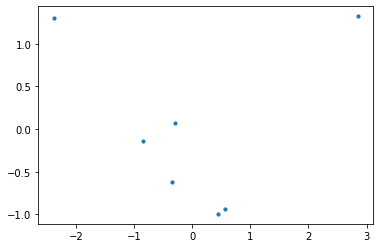

In [566]:
filtered_data=[]
for sequence in data:  
    if (len(sequence.seq)==249):
       
        filtered_data.append(sequence.seq)
   
print(len(filtered_data))

scores=[]
for sequence in filtered_data:  
    alignments0 = local_aligner.align(expected[0].seq,sequence)  
    alignments1 = local_aligner.align(expected[1].seq,sequence)  
    alignments2 = local_aligner.align(expected[2].seq,sequence)  
    scores.append([alignments0[0].score,alignments1[0].score,alignments2[0].score])
    
from sklearn.preprocessing import StandardScaler
scores_standard = StandardScaler().fit_transform(scores)
print(scores_standard)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scores_standard)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
print(principalDf)
print(principalDf.PC1.values)
print(principalDf.PC2.values)
plt.scatter(principalDf.PC1.values, principalDf.PC2.values,  cmap=plt.get_cmap("cool"), s=10)

#principalComponents

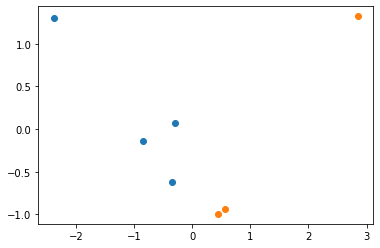

In [567]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
X=principalComponents
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

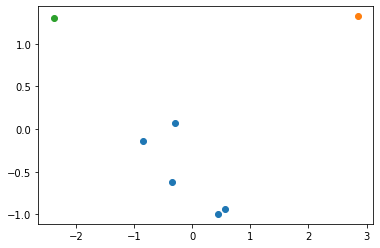

In [568]:

X=principalComponents
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

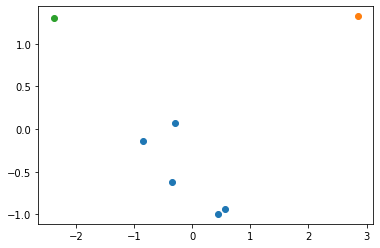

In [569]:
X=principalComponents

# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot

model = Birch(threshold=0.01, n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
    

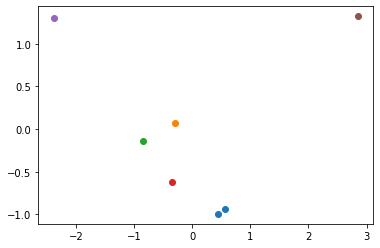

In [570]:
X=principalComponents
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define the model
model = DBSCAN(eps=0.2, min_samples=1)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

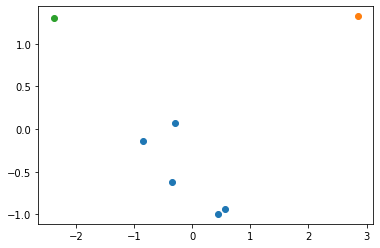

In [571]:
X=principalComponents
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [572]:
X=principalComponents
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot

model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

ValueError: min_samples must be no greater than the number of samples (7). Got 10

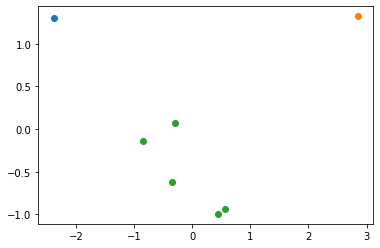

In [573]:
X=principalComponents
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot

model = SpectralClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

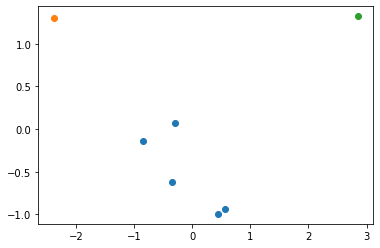

In [574]:
X=principalComponents
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot


model = GaussianMixture(n_components=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

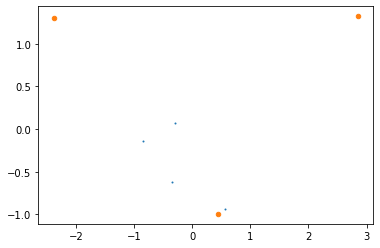

In [575]:
gmm=model
plt.scatter(X[:,0], X[:, 1], s = 1)
import scipy as sc
centers = np.empty(shape=(gmm.n_components, X.shape[1]))
for i in range(gmm.n_components):
    density = sc.stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], s=20)
plt.show()

In [576]:
print(centers)

[[ 0.44707609 -0.99446053]
 [-2.38206776  1.30073117]
 [ 2.85197896  1.321716  ]]


In [577]:
cluster1=[]
cluster2=[]
cluster3=[]
for i in range (len(principalComponents)): 
    if(abs((principalComponents[i][0])-centers[0][0])<0.005):
        cluster1.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[1][0])<0.005):
        cluster2.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[2][0])<0.005):
        cluster3.append((i,scores[i]))
        
print(cluster1)
print()
print(cluster2)
print()
print(cluster3)
print()

[(0, [206.0, 215.0, 193.0])]

[(4, [211.0, 221.0, 199.0])]

[(6, [208.0, 203.0, 184.0])]



In [578]:
clusters=[cluster1,cluster2,cluster3]
for k in range(K):
    matrix=[]
    for i in clusters[k]:
        row=[]
        for j in clusters[k]:
            alignments = local_aligner.align(filtered_data[i[0]],filtered_data[j[0]])
            shorter=min(len(filtered_data[i[0]]),len(filtered_data[j[0]]))
            row.append(shorter-alignments[0].score)
        matrix.append(row)
    matrix=np.array(matrix)        
    print(matrix)
    print("Matrix mean=", np.mean(matrix))

[[0.]]
Matrix mean= 0.0
[[0.]]
Matrix mean= 0.0
[[0.]]
Matrix mean= 0.0


In [579]:
for k in range(K):
    for i in clusters[k]:
        print(filtered_data[i[0]])
        print()
    print("*******************************************************************************************************")

GATTCCTCTCTCTGCAGCACATTTCCTGCTGTATACTACGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGTCCGCCAAGTACTGGACAGCCAGAAGGAGTACATGGAGCAGACGCGGCCGAGGTGGACAGGTACGTGCAGACGACAA

*******************************************************************************************************
GATCCTCTCTCTGCAGCACATTTCCTGCTGTATACTACGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGTCCGCCAAGTACTGGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGCCGAGGTGGACAGGTACTGCAGACACAACT

*******************************************************************************************************
GATCCTCTCTCTGCAGCACATTTCCTGCTGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTCGGCCGAGTACCTGGAACAGCCAGAAGGAGTACATGGAGCGGACGCGGCCGAGGGTGGACAGCGTACGTGACACGA

***************************************

In [ ]:
#OVO BI TREBALE BIT TE TRI VRSTE VALJDA